#**SEPAL OF IRIS** 


##K-Means Clustering
---

###Import Library
---
Import terlebih dahulu library yang dibutuhkan

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

###Read CSV Files
---
Membaca file .csv yang akan di**cluster**kan.

In [ ]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###File Shape
---
Menunjukkan banyak kolom dan baris dari data yang sudah di**upload**

In [ ]:
iris.shape

(150, 6)

###Deskripsi Data
---
Menunjukkan deskripsi dari data yang digunakan.

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###Data Checking
---
Mengecek apakah isi dari data terdapat null atau tidak.

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###Data Scatter Plot
---
Menyajikan hasil dari scatter plot dari data Iris.

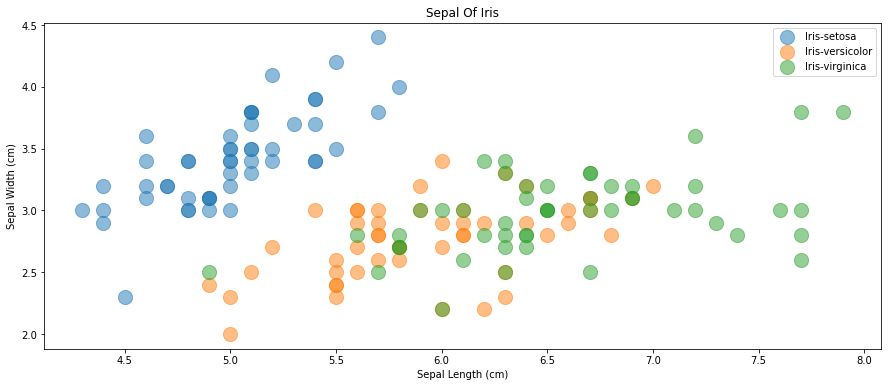

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for species in ['Iris-setosa' , 'Iris-versicolor', 'Iris-virginica']:
    plt.scatter(x = 'SepalLengthCm' , y = 'SepalWidthCm' , data = iris[iris['Species'] == species] ,
                s = 200 , alpha = 0.5 , label = species)
plt.xlabel('Sepal Length (cm)'), plt.ylabel('Sepal Width (cm)') 
plt.title('Sepal Of Iris')
plt.legend()
plt.show()

###Elbow Method
---
Menyajikan Elbow Method dari data Iris

In [ ]:
iris_x = iris[['SepalLengthCm' , 'SepalWidthCm']].iloc[: , :].values
inertia = []

for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 200  , algorithm='elkan') )
    kmeans.fit(iris_x)
    inertia.append(kmeans.inertia_)


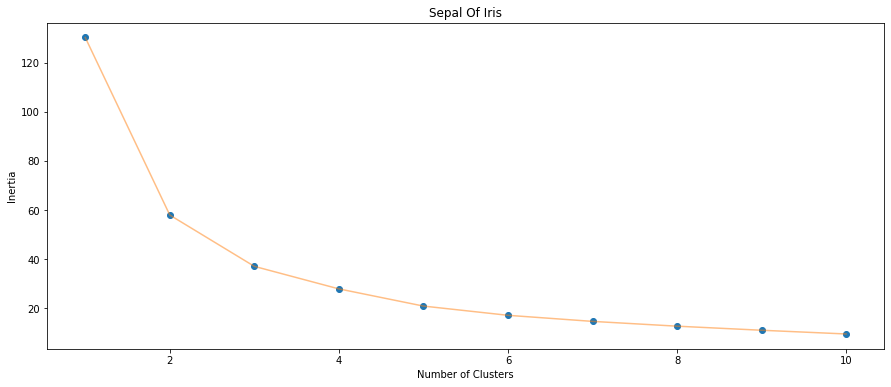

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('Sepal Of Iris')
plt.show()

###Pengubahan Data menjadi Array Numpy
---
Data yang ada diubah menjadi Array Numpy untuk mempermudah clustering 

In [ ]:
x_array =  np.array(iris_x)
print(x_array)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

###Data Preprocessing
---
Melakukan standardisasi pada nilai array menggunakan StandardScaler

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

###K-Means Clustering
---
Melakukan clustering pada data Iris dan menentukan centroidnya.

In [ ]:
kmeans = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 200  , algorithm='elkan') )

kmeans.fit(iris_x)
centroid = kmeans.cluster_centers_
iris["Cluster"] = kmeans.labels_
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,4
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,4


###Scatter Plot setelah Clustering
---
Scatter plot hasil clustering menggunakan K-Means.

In [ ]:
h = 0.02
x_min, x_max = iris_x[:, 0].min() - 1, iris_x[:, 0].max() + 1
y_min, y_max = iris_x[:, 1].min() - 1, iris_x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

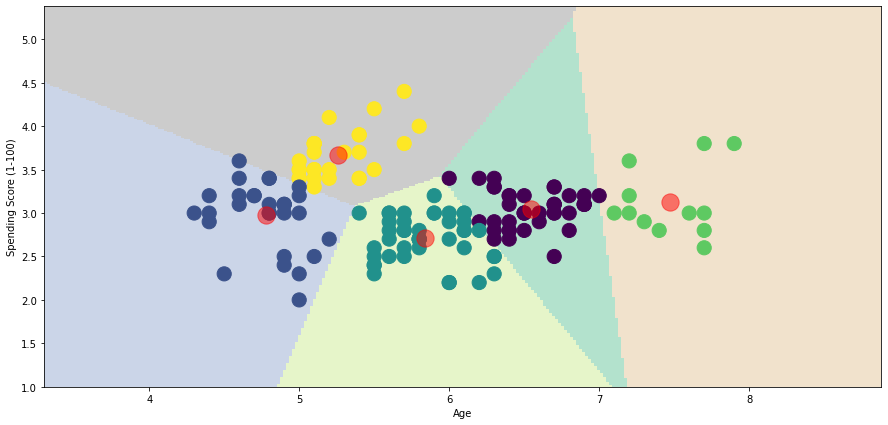

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'SepalLengthCm' ,y = 'SepalWidthCm' , data = iris , c = iris["Cluster"] , s = 200 )
plt.scatter(x = centroid[: , 0] , y =  centroid[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

###Silhouette Score
---
Menampilkan silhouette score dari hasil clustering.

In [ ]:
score = silhouette_score(x_scaled, kmeans.labels_, metric="euclidean")

score

0.33861053133413566

##AGGLOMERATIVE HIERARCHY CLUSTERING
---

###Import Library AHC
---
Import library yang digunakan untuk Agglomerrative Hierarchy Clustering.

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

###Data Preprocessing
---
Melakukan standardisasi kembali untuk AHC.

In [ ]:
aglo_iris = StandardScaler().fit_transform(iris_x)
aglo_iris

###Agglomerative Hierarchy Clustering Linkage Type

####Clustering dengan Complete Linkage AHC
---
Melakukan hierarchy clustering dengan metode complete linkage.

#####Penentuan Cluster
---
Menentukan cluster dalam data Iris.

In [ ]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglom.fit(aglo_iris)
agglom.labels_

#####Distance Matrix 
---
Menentukan jarak matriks data Iris.

In [ ]:
dist_matrix = distance_matrix(aglo_iris,aglo_iris)
dist_matrix

#####AHC Complete Linkage Dendogram
---
Menampilkan dendogram hasil AHC complete linkage.

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

#####Silhouette Score
---
Menunjukkan silhouette score dari complete linkage.


In [ ]:
clusters = fcluster(Z, 4, criterion='maxclust')
metrics.silhouette_score(iris_x,clusters)

####Clustering dengan Single Linkage AHC
---
Melakukan hierarchy clustering dengan metode single linkage.

####Clustering dengan Single Linkage AHC
---
Melakukan hierarchy clustering dengan metode single linkage.

#####Penentuan Cluster
---
Menentukan cluster untuk AHC

In [ ]:
aggloms = AgglomerativeClustering(n_clusters=4, linkage='single')
Zs = hierarchy.linkage(dist_matrix, 'single')
dendros = hierarchy.dendrogram(Zs)

#####AHC Single Linkage Dendogram
---
Menampilkan dendogram dari hasil AHC Single Linkage

In [ ]:
clusters = fcluster(Zs, 4, criterion='maxclust')
metrics.silhouette_score(iris_x,clusters)

####Clustering dengan Average Linkage AHC
---
Menampilkan silhouette score untuk AHC Average Linkage

#####Penentuan Cluster
---
Menampilkan silhouette score untuk AHC Average Linkage

In [ ]:
aggloavg = AgglomerativeClustering(n_clusters=4, linkage='average')
aggloavg.fit(aglo_iris)
aggloavg.labels_

#####AHC Average Linkage Dendogram
---
Menampilkan dendogram hasil AHC Average Linkage.

In [ ]:
Zavg = hierarchy.linkage(dist_matrix, 'average')
dendravg = hierarchy.dendrogram(Zavg)

#####Silhouette Score
---
Menampilkan dendogram hasil AHC Average Linkage.

In [ ]:
clusters = fcluster(Zavg, 4, criterion='maxclust')
metrics.silhouette_score(iris_x,clusters)